# Part 2: Predictive Modeling – Predicting Delivery Delay

In [19]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# 📁 Load Cleaned Dataset
df = pd.read_csv("olist_cleaned_merged.csv")

In [21]:
# Target Variable
# Predict whether delivery was late or not (is_late: 1 = Late, 0 = On-time)
target = "is_late"

# Select Features
features = [
    "payment_value", "payment_installments",
    "days_to_deliver", "review_score",
    "product_category_name"
]

In [22]:
data = df[features + [target]].copy()

In [23]:
# One-Hot Encode categorical
data = pd.get_dummies(data, columns=["product_category_name"], drop_first=True)

In [24]:
#  Train-Test Split
X = data.drop(columns=[target])
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# 🚀 Model 1: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [26]:
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], shape=(22644,))

In [27]:
# Evaluation
print("📊 Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

📊 Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     21099
           1       0.86      0.68      0.76      1545

    accuracy                           0.97     22644
   macro avg       0.92      0.83      0.87     22644
weighted avg       0.97      0.97      0.97     22644



In [28]:
#  odel 2: Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [29]:
print(" Logistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred_lr))

 Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     21099
           1       0.86      0.61      0.71      1545

    accuracy                           0.97     22644
   macro avg       0.92      0.80      0.85     22644
weighted avg       0.96      0.97      0.96     22644



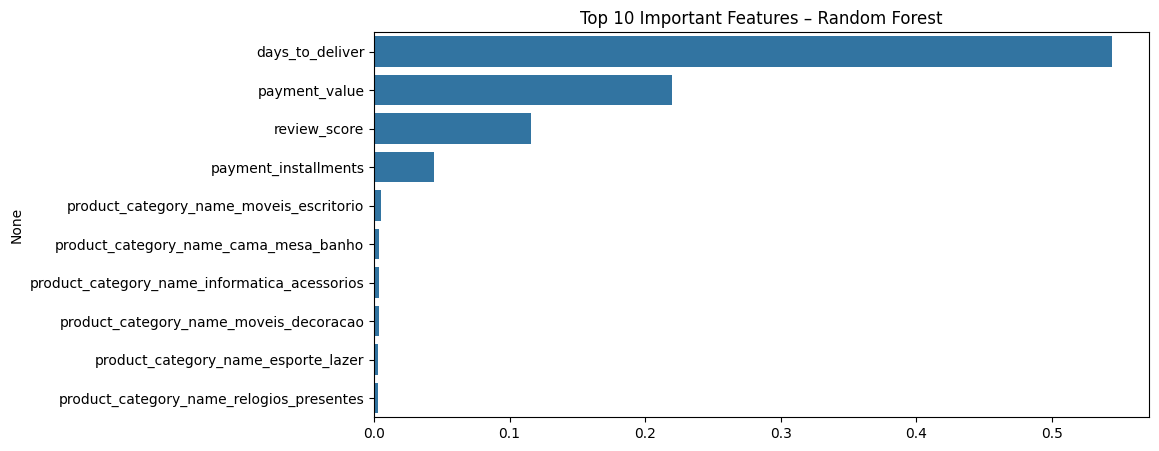

In [30]:
# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]
plt.figure(figsize=(10,5))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Top 10 Important Features – Random Forest")
plt.show()